In [1]:
# Imports

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Data Preprocessing (Filtering words)

In [2]:
# Importing the dataset

df = pd.read_csv('Data/Dataset-1.csv')

print(df.shape)
print(df.columns)

(20972, 9)
Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


In [3]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Keeping full stops for sentence tokenization
    text = re.sub(r'[^a-zA-Z\s.]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    sentences = sent_tokenize(cleaned_text)
    
    # Removing fullstops for sentence tokenization
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    
    words = word_tokenize(cleaned_text)

    filtered_words = [word for word in words if word.lower() not in stop_words]
    stemmed_words = [ps.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return cleaned_text, sentences, filtered_words, stemmed_words, lemmatized_words

In [4]:
# Looping through the df, tokenizing the data in "TITLE", "ABSTRACT" columns and storing them in new columns

data_list = []

for i in range(0, df.shape[0]):
    title = df.loc[i, 'TITLE']
    abstract = df.loc[i, 'ABSTRACT']
    
    # title = title.split()
    # abstract = abstract.split()
    
    cleaned_text_title, sentences_title, filtered_words_title, stemmed_words_title, lemmatized_words_title = preprocess_text(title)
    cleaned_text_abstract, sentences_abstract, filtered_words_abstract, stemmed_words_abstract, lemmatized_words_abstract = preprocess_text(abstract)
    
    # print("Title: ", title)
    # print("Cleaned Text Title: ", cleaned_text_title)
    # print("Sentences Title: ", sentences_title)
    # print("Filtered Words Title: ", filtered_words_title)
    # print("Stemmed Words Title: ", stemmed_words_title)
    # print("Lemmatized Words Title: ", lemmatized_words_title)
    
    # print(type(cleaned_text_title))
    # print(type(filtered_words_title))
    # print(type(stemmed_words_title))
    # print(type(lemmatized_words_title))
    
    data_list.append({
        "Original Title": title,
        "Cleaned Title": cleaned_text_title,
        "Filtered Words Title": " ".join(filtered_words_title),
        "Stemmed Words Title": " ".join(stemmed_words_title),
        "Lemmatized Words Title": " ".join(lemmatized_words_title),
        "Original Abstract": abstract,
        "Cleaned Abstract": cleaned_text_abstract,
        "Filtered Words Abstract": " ".join(filtered_words_abstract),
        "Stemmed Words Abstract": " ".join(stemmed_words_abstract),
        "Lemmatized Words Abstract": " ".join(lemmatized_words_abstract),
    })
    
    

df_processed = pd.DataFrame(data_list)

df_processed = df_processed.dropna()

df_processed.reset_index(drop=True, inplace=True)

print(df_processed.shape)

df_processed.to_csv("processed_text.csv", index=False)


(20972, 10)


In [5]:
print(df_processed.head())
print(df_processed.columns)

print(df_processed.shape)

                                      Original Title  \
0        Reconstructing Subject-Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                       Cleaned Title  \
0        Reconstructing Subject Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                Filtered Words Title  \
0        Reconstructing Subject Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics Poisson kernels polyha...   
3  finite element approximation stochastic Maxwel...   
4  Comparative study Discrete Wavelet Transfor

## TF-IDF

In [2]:
df1 = pd.read_csv('Data/Dataset-1.csv')
df2 = pd.read_csv('processed_text.csv')

df = pd.concat([df1, df2], axis=1)
print(df.shape)

(20972, 19)


In [3]:
nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)

df = df.dropna()

print(df.shape)

        ID    TITLE                                           ABSTRACT  \
8270  8271  D4M 3.0    The D4M tool is used by hundreds of research...   

      Computer Science  Physics  Mathematics  Statistics  \
8270                 1        0            0           0   

      Quantitative Biology  Quantitative Finance Original Title Cleaned Title  \
8270                     0                     0        D4M 3.0          D M    

     Filtered Words Title Stemmed Words Title Lemmatized Words Title  \
8270                  NaN                 NaN                    NaN   

                                      Original Abstract  \
8270    The D4M tool is used by hundreds of research...   

                                       Cleaned Abstract  \
8270  The D M tool is used by hundreds of researcher...   

                                Filtered Words Abstract  \
8270  tool used hundreds researchers perform complex...   

                                 Stemmed Words Abstract  \
8270  

In [4]:
Y = df[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

print(Y.shape)
print(Y[:5][:])

(20971, 6)
   Computer Science  Physics  Mathematics  Statistics  Quantitative Biology  \
0                 1        0            0           0                     0   
1                 1        0            0           0                     0   
2                 0        0            1           0                     0   
3                 0        0            1           0                     0   
4                 1        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["PROCESSED_TEXT"] = df["Filtered Words Title"] + " " + df["Filtered Words Abstract"]

print(df["PROCESSED_TEXT"][0])

tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(df["PROCESSED_TEXT"])

print(X_tfidf)

Reconstructing Subject Specific Effect Maps Predictive models allow subject specific inference analyzing disease related alterations neuroimaging data Given subject data inference made two levels global ie identifiying condition presence subject local ie detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named RSM improve subject specific detections predictive modeling approaches particular binary classifiers RSM specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper type algorithm used different binary classifiers diagnostic manner ie without information condition presence Reconstruction posed Maximum Posteriori problem prior model whose parameters estimated training data clas

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

X_tfidf_tensor = torch.tensor(X_tfidf.toarray(), dtype=torch.float32)
Y_tensor = torch.tensor(Y.values, dtype=torch.long)

dataset = TensorDataset(X_tfidf_tensor, Y_tensor)

total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


In [9]:
import torch

torch.save({
    "train": train_dataset,
    "val": val_dataset,
    "test": test_dataset
}, "dataset.pth")

print("Datasets saved successfully!")


Datasets saved successfully!


In [10]:
loaded_data = torch.load("dataset.pth")
train_dataset = loaded_data["train"]
val_dataset = loaded_data["val"]
test_dataset = loaded_data["test"]

/tmp/ipykernel_16432/564663002.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load("dataset.pth")


In [12]:
batch_size = 32
train_loader_tfidf = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_tfidf = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_tfidf = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(len(train_loader_tfidf))
print(len(val_loader_tfidf))
print(len(test_loader_tfidf))

459
66
132


## Model 1

Epoch 1/20 - Train Loss: 0.3457, Val Loss: 0.2301
Epoch 2/20 - Train Loss: 0.2086, Val Loss: 0.2003
Epoch 3/20 - Train Loss: 0.1824, Val Loss: 0.1917
Epoch 4/20 - Train Loss: 0.1674, Val Loss: 0.1874
Epoch 5/20 - Train Loss: 0.1558, Val Loss: 0.1849
Epoch 6/20 - Train Loss: 0.1455, Val Loss: 0.1818
Epoch 7/20 - Train Loss: 0.1362, Val Loss: 0.1813
Epoch 8/20 - Train Loss: 0.1277, Val Loss: 0.1799
Epoch 9/20 - Train Loss: 0.1205, Val Loss: 0.1801
Epoch 10/20 - Train Loss: 0.1140, Val Loss: 0.1800
Epoch 11/20 - Train Loss: 0.1077, Val Loss: 0.1805
Epoch 12/20 - Train Loss: 0.1029, Val Loss: 0.1803
Epoch 13/20 - Train Loss: 0.0984, Val Loss: 0.1810
Epoch 14/20 - Train Loss: 0.0948, Val Loss: 0.1820
Epoch 15/20 - Train Loss: 0.0913, Val Loss: 0.1849
Epoch 16/20 - Train Loss: 0.0886, Val Loss: 0.1848
Epoch 17/20 - Train Loss: 0.0862, Val Loss: 0.1855
Epoch 18/20 - Train Loss: 0.0844, Val Loss: 0.1861
Epoch 19/20 - Train Loss: 0.0823, Val Loss: 0.1865
Epoch 20/20 - Train Loss: 0.0805, Val Lo

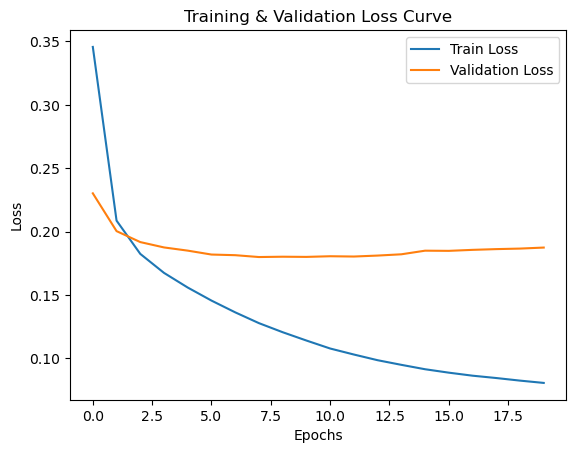

Test Accuracy: 92.24%


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# simple Feedforward Neural Network
class MultiLabelNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        self.sigmoid = nn.Sigmoid()  # sigmoid activation for multilabel

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)

# Define training function
def train_model(model, train_loader, val_loader, num_epochs=5, learning_rate=0.001):
    criterion = nn.BCELoss()  # Binary Cross Entropy for multi-label classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())  # Ensure labels are float
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.float())
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Get input and output sizes
input_size = next(iter(train_loader_tfidf))[0].shape[1]  # Feature size
num_classes = next(iter(train_loader_tfidf))[1].shape[1]  # Number of labels

# Initialize the model
model = MultiLabelNN(input_size, num_classes)

# Train the model
train_losses, val_losses = train_model(model, train_loader_tfidf, val_loader_tfidf, num_epochs=20)

# Plot train vs validation loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss Curve")
plt.show()


In [28]:
# Define test accuracy function
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            
            # If a row of predictions doesnt give a value 1, then find the label that has the maximum value in output and set to 1
            for i in range(len(predictions)):
                if predictions[i].sum() == 0:
                    max_val, max_index = torch.max(outputs[i], 0)
                    predictions[i][max_index] = 1
                    
            # print("predictions:", predictions)
            # print("labels:", labels)
            correct += (predictions == labels).sum().item()
            total += labels.numel()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    
test_model(model, test_loader_tfidf)

predictions: tensor([[1., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
 